In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np

In [2]:
df = pd.read_csv('./XAUUSD_H1_201401020900_202312070800.csv',sep='\t')
df

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2014.01.02,09:00:00,1225.12,1228.51,1220.59,1222.90,4162,2258940,42
1,2014.01.02,10:00:00,1222.93,1224.00,1219.78,1221.74,3129,1977417,44
2,2014.01.02,11:00:00,1221.89,1221.99,1219.18,1221.32,2752,2504400,35
3,2014.01.02,12:00:00,1221.33,1221.80,1219.22,1221.22,2153,1951500,38
4,2014.01.02,13:00:00,1221.21,1221.47,1216.43,1218.02,4022,2782348,41
...,...,...,...,...,...,...,...,...,...
58445,2023.12.07,04:00:00,2026.13,2029.98,2026.13,2029.04,1672,0,10
58446,2023.12.07,05:00:00,2029.04,2029.90,2026.44,2026.84,1794,0,5
58447,2023.12.07,06:00:00,2026.83,2027.09,2025.36,2026.06,1491,0,5
58448,2023.12.07,07:00:00,2026.06,2027.38,2025.23,2026.78,2239,0,5


In [3]:
df.columns

Index(['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<TICKVOL>',
       '<VOL>', '<SPREAD>'],
      dtype='object')

In [4]:
df.describe()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
count,58450.000000,58450.000000,58450.000000,58450.000000,58450.000000,5.845000e+04,58450.000000
mean,1488.715193,1490.500547,1486.872264,1488.718606,4379.877040,1.226444e+06,18.527186
std,291.887572,292.345420,291.381454,291.891178,3315.260362,3.332373e+06,13.928759
min,1050.050000,1050.570000,1046.230000,1050.050000,1.000000,0.000000e+00,0.000000
25%,1245.932500,1247.160000,1244.670000,1245.932500,2086.000000,0.000000e+00,5.000000
50%,1329.030000,1330.345000,1327.570000,1328.985000,3523.000000,0.000000e+00,17.000000
75%,1793.335000,1795.140000,1791.247500,1793.327500,5670.750000,1.511342e+06,24.000000
max,2117.530000,2134.570000,2090.830000,2117.530000,40958.000000,8.671691e+07,496.000000


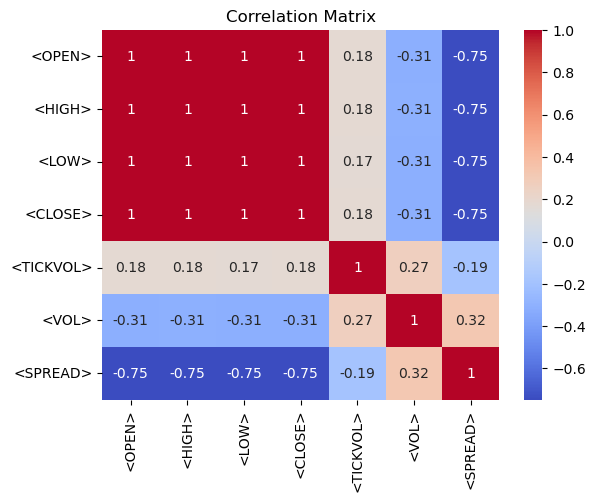

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.drop(["<DATE>", "<TIME>"], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [6]:
df.isnull().sum()

<DATE>       0
<TIME>       0
<OPEN>       0
<HIGH>       0
<LOW>        0
<CLOSE>      0
<TICKVOL>    0
<VOL>        0
<SPREAD>     0
dtype: int64

In [7]:
for column in df.columns:
    print(column, df[column].nunique())

<DATE> 2564
<TIME> 24
<OPEN> 37643
<HIGH> 37707
<LOW> 37694
<CLOSE> 37597
<TICKVOL> 12156
<VOL> 23747
<SPREAD> 92


In [8]:
df.sample(10)

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
51267,2022.09.20,12:00:00,1668.92,1670.28,1666.59,1667.81,5294,0,10
4027,2014.09.08,09:00:00,1269.24,1269.30,1268.01,1269.17,1583,533220,50
42979,2021.04.28,12:00:00,1769.75,1770.01,1763.48,1766.29,4806,0,0
20586,2017.07.05,19:00:00,1223.31,1224.00,1222.47,1223.14,2362,1293893,24
14585,2016.06.28,21:00:00,1314.26,1315.57,1311.48,1312.87,6305,5233262,31
58318,2023.11.29,15:00:00,2041.46,2042.94,2037.25,2039.08,7125,0,6
51634,2022.10.12,17:00:00,1670.86,1672.72,1667.86,1670.17,11790,0,4
50463,2022.08.02,11:00:00,1772.19,1774.31,1770.44,1773.41,4912,0,0
38084,2020.06.29,10:00:00,1771.80,1771.80,1768.52,1769.07,3812,0,5
19966,2017.05.29,12:00:00,1267.22,1267.62,1266.77,1267.47,1312,542345,24


## Bad column

In [9]:
df[df["<VOL>"] != 0]

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2014.01.02,09:00:00,1225.12,1228.51,1220.59,1222.90,4162,2258940,42
1,2014.01.02,10:00:00,1222.93,1224.00,1219.78,1221.74,3129,1977417,44
2,2014.01.02,11:00:00,1221.89,1221.99,1219.18,1221.32,2752,2504400,35
3,2014.01.02,12:00:00,1221.33,1221.80,1219.22,1221.22,2153,1951500,38
4,2014.01.02,13:00:00,1221.21,1221.47,1216.43,1218.02,4022,2782348,41
...,...,...,...,...,...,...,...,...,...
24115,2018.02.09,19:00:00,1317.20,1319.08,1312.22,1312.50,21858,6765091,14
24116,2018.02.09,20:00:00,1312.43,1317.28,1311.99,1315.17,18982,5987650,14
24117,2018.02.09,21:00:00,1315.20,1315.45,1312.34,1314.33,18707,6500351,14
24118,2018.02.09,22:00:00,1314.34,1315.71,1312.93,1314.68,14559,6148001,14


In [10]:
df = df.drop(["<VOL>"], axis=1)
df

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<SPREAD>
0,2014.01.02,09:00:00,1225.12,1228.51,1220.59,1222.90,4162,42
1,2014.01.02,10:00:00,1222.93,1224.00,1219.78,1221.74,3129,44
2,2014.01.02,11:00:00,1221.89,1221.99,1219.18,1221.32,2752,35
3,2014.01.02,12:00:00,1221.33,1221.80,1219.22,1221.22,2153,38
4,2014.01.02,13:00:00,1221.21,1221.47,1216.43,1218.02,4022,41
...,...,...,...,...,...,...,...,...
58445,2023.12.07,04:00:00,2026.13,2029.98,2026.13,2029.04,1672,10
58446,2023.12.07,05:00:00,2029.04,2029.90,2026.44,2026.84,1794,5
58447,2023.12.07,06:00:00,2026.83,2027.09,2025.36,2026.06,1491,5
58448,2023.12.07,07:00:00,2026.06,2027.38,2025.23,2026.78,2239,5


## Merge date and time

In [11]:
def convert_datetime(df):
    df['<DATETIME>'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'], format='%Y.%m.%d %H:%M:%S')
    df = df.drop(["<DATE>", "<TIME>"], axis=1)
    return df

df = convert_datetime(df)
df = df.set_index('<DATETIME>')
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<SPREAD>
<DATETIME>,,,,,,
2014-01-02 09:00:00,1225.12,1228.51,1220.59,1222.90,4162,42
2014-01-02 10:00:00,1222.93,1224.00,1219.78,1221.74,3129,44
2014-01-02 11:00:00,1221.89,1221.99,1219.18,1221.32,2752,35
2014-01-02 12:00:00,1221.33,1221.80,1219.22,1221.22,2153,38
2014-01-02 13:00:00,1221.21,1221.47,1216.43,1218.02,4022,41
...,...,...,...,...,...,...
2023-12-07 04:00:00,2026.13,2029.98,2026.13,2029.04,1672,10
2023-12-07 05:00:00,2029.04,2029.90,2026.44,2026.84,1794,5
2023-12-07 06:00:00,2026.83,2027.09,2025.36,2026.06,1491,5


## Resample data

In [12]:
df = df.resample(rule='24H').mean().ffill()  # Sat and Sun is missing
df

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<SPREAD>
<DATETIME>,,,,,,
2014-01-02,1223.126000,1225.176000,1220.612667,1223.062667,3738.933333,39.866667
2014-01-03,1232.378696,1234.838696,1230.808261,1232.922174,3020.347826,38.434783
2014-01-04,1232.378696,1234.838696,1230.808261,1232.922174,3020.347826,38.434783
2014-01-05,1232.378696,1234.838696,1230.808261,1232.922174,3020.347826,38.434783
2014-01-06,1239.765217,1241.731739,1236.598261,1239.736957,3301.913043,39.173913
...,...,...,...,...,...,...
2023-12-03,2046.766957,2050.416957,2045.009565,2048.223478,2811.739130,5.434783
2023-12-04,2064.097826,2069.363478,2056.446087,2062.102174,3611.260870,5.043478
2023-12-05,2027.487391,2030.262609,2024.482609,2026.853478,3242.434783,5.869565


# Drop  OPEN HIGH LOW because correlation is super high

In [13]:
df = df.drop(["<OPEN>", "<HIGH>", "<LOW>", "<TICKVOL>", "<SPREAD>"], axis=1)

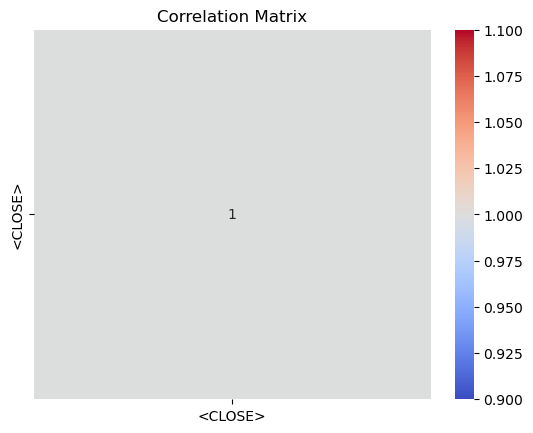

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# OVERVIEW

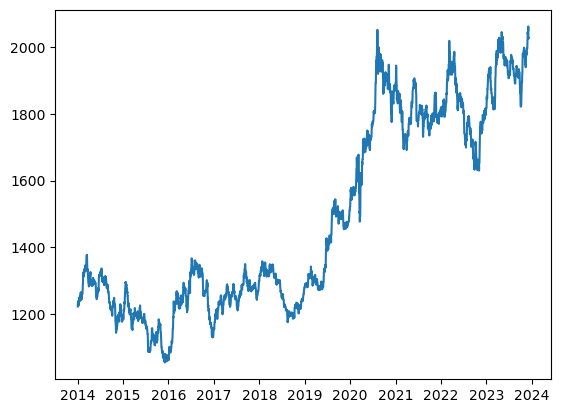

In [15]:
plt.plot(df['<CLOSE>'])

## Split dataset

In [16]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]
df_train, df_test = train_test_split(df, 14)

# Prepare data for supervised learning

In [17]:
# transform a time series dataset into separate input and output dataframes
# n is number of next hours to predict
def series_to_supervised(data, n_in=1, n_out=1, n_step=1, dropnan=True):
  df = pd.DataFrame(data)
  input_cols, input_names = list(), list()
  output_cols, output_names = list(), list()
  
  # input sequence (t-n, ... t-1)
  for i in range(n_in * n_step, 0, -n_step):
    input_cols.append(df.shift(i))
    input_names += [('%s+%d' % (name, i)) for name in df.columns]
  
  # output sequence (t)
  for i in range(0, n_out * n_step, n_step):
    output_cols.append(df.shift(-i))
    output_names += [('%s-%d' % (name, i)) for name in df.columns]
  
  # put it all together
  input_df = pd.concat(input_cols, axis=1)
  input_df.columns = input_names
  
  output_df = pd.concat(output_cols, axis=1)
  output_df.columns = output_names
  
  # drop rows with NaN values
  if dropnan:
    input_df.dropna(inplace=True)
    output_df.dropna(inplace=True)
    input_df = input_df[input_df.index.isin(output_df.index)]
    output_df = output_df[output_df.index.isin(input_df.index)]
  
  return input_df, output_df


In [18]:
N = 1
WINDOWSIZE = 7
train_df_supervised_in , train_df_supervised_out = series_to_supervised(df_train, n_in=WINDOWSIZE,n_out=1,n_step=N)
train_df_supervised_in

,<CLOSE>+7,<CLOSE>+6,<CLOSE>+5,<CLOSE>+4,<CLOSE>+3,<CLOSE>+2,<CLOSE>+1
<DATETIME>,,,,,,,
2014-01-09,1223.062667,1232.922174,1232.922174,1232.922174,1239.736957,1235.996087,1225.836957
2014-01-10,1232.922174,1232.922174,1232.922174,1239.736957,1235.996087,1225.836957,1227.098261
2014-01-11,1232.922174,1232.922174,1239.736957,1235.996087,1225.836957,1227.098261,1237.662609
2014-01-12,1232.922174,1239.736957,1235.996087,1225.836957,1227.098261,1237.662609,1237.662609
2014-01-13,1239.736957,1235.996087,1225.836957,1227.098261,1237.662609,1237.662609,1237.662609
...,...,...,...,...,...,...,...
2023-11-19,1949.353043,1939.980000,1952.400435,1965.448696,1970.393478,1984.668696,1984.668696
2023-11-20,1939.980000,1952.400435,1965.448696,1970.393478,1984.668696,1984.668696,1984.668696
2023-11-21,1952.400435,1965.448696,1970.393478,1984.668696,1984.668696,1984.668696,1976.787391


In [19]:
# def rf_forecast(trainX, trainy, testX):
#     # split into input and output columns
#     # fit model
#     model = RandomForestRegressor(n_jobs=-1)
#     model.fit(trainX, trainy)
#     # make a one-step prediction
#     yhat = model.predict(testX)
#     print(yhat,type(yhat))
#     return yhat

def rf_forecast(trainX, trainy, testX):
    # split into input and output columns
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(testX)
    print(yhat,type(yhat))
    return np.array( [ yhat ] )

# walk-forward validation for univariate data
def walk_forward_validation(dataX,dataY, n_test):
    predictions = list()
    trainX, testX = train_test_split(dataX, n_test)
    trainY, testY = train_test_split(dataY, n_test)
    
    # seed history with training dataset
    historyX = trainX.values.tolist()
    historyY = trainY.values.tolist()
    testX = testX.values.tolist()
    testY = testY.values.tolist()
    
    # step over each time-step in the test set
    for i in range(len(testX)):
        # split test row into input and output columns
        # fit model on history and make a prediction
        # print(testX[i])
        yhat = rf_forecast(historyX, historyY, [ testX[i] ])
        # store forecast in list of predictions
        predictions.append(yhat[0])
        # add actual observation to history for the next loop
        historyX.append(testX[i])
        historyY.append(testY[i])
        # summarize progress
    # estimate prediction error
    error = mean_absolute_error(testY, predictions)
    return error, testY, predictions[1:]

[1952.2244] <class 'numpy.ndarray'>
[1947.9894] <class 'numpy.ndarray'>
[1952.187] <class 'numpy.ndarray'>
[1938.4902] <class 'numpy.ndarray'>
[1934.9803] <class 'numpy.ndarray'>
[1951.3962] <class 'numpy.ndarray'>
[1962.972] <class 'numpy.ndarray'>
[1970.4491] <class 'numpy.ndarray'>
[1996.586] <class 'numpy.ndarray'>
[1981.6807] <class 'numpy.ndarray'>
[1979.9125] <class 'numpy.ndarray'>
[1962.5385] <class 'numpy.ndarray'>
[2015.0696] <class 'numpy.ndarray'>
[1996.6442] <class 'numpy.ndarray'>
MAE: 9.412


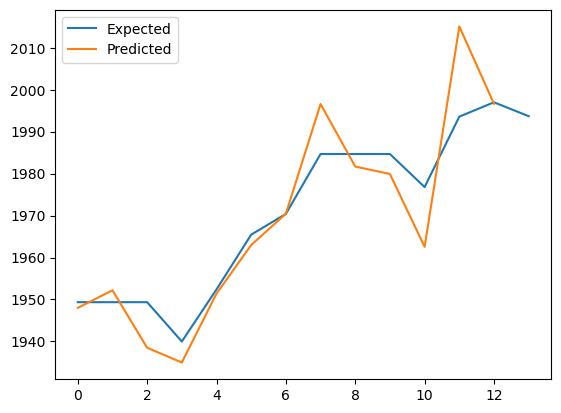

In [20]:
mae, y, yhat = walk_forward_validation(train_df_supervised_in, train_df_supervised_out, 14)
print('MAE: %.3f' % mae)
# plot expected vs preducted
plt.plot(y, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()


# Predicting a totally unseen data

In [21]:
test_df_supervised_in , test_df_supervised_out = series_to_supervised(df_test, n_in=WINDOWSIZE,n_out=1,n_step=N)

In [22]:
def forecast(trainX, trainY, amount):
    predictions = list()

    historyX = trainX.values.tolist()
    historyY = trainY.values.tolist()

    for i in range(amount):
        lastHistoryX = historyX[-1]
        lastHistoryY = historyY[-1]

        newWindow = lastHistoryX[len( df.columns ):] + list( lastHistoryY )
        yhat = rf_forecast(historyX, historyY, [newWindow])

        predictions.append(list( yhat[0] ))
        ## COMPLICATION HERE
        historyX.append(newWindow)
        ## COMPLICATION HERE

        historyY.append(yhat[0])

    return predictions

In [23]:
forcastedY = forecast(test_df_supervised_in, test_df_supervised_out, len(test_df_supervised_in))

[2026.1393] <class 'numpy.ndarray'>
[2029.4811] <class 'numpy.ndarray'>
[2026.3] <class 'numpy.ndarray'>
[2026.2555] <class 'numpy.ndarray'>
[2027.5032] <class 'numpy.ndarray'>
[2026.8424] <class 'numpy.ndarray'>
[2026.7477] <class 'numpy.ndarray'>


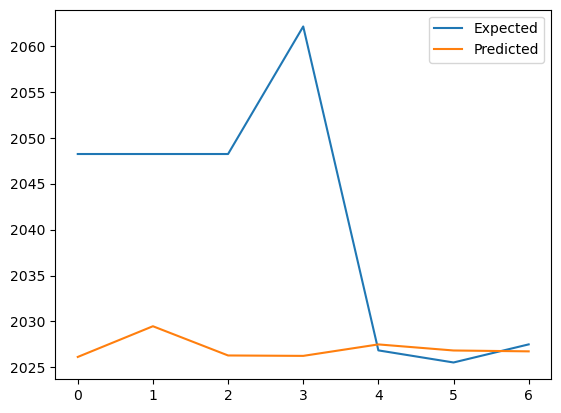

In [24]:

plt.plot(test_df_supervised_out["<CLOSE>-0"].values.tolist(), label='Expected')
plt.plot([row[0] for row in forcastedY], label='Predicted')
plt.legend()
plt.show()


## REFS
- https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
- https://machinelearningmastery.com/time-series-forecasting-supervised-learning/